# Homework 1

Aprendizagem 2023/2024 - LEIC @ IST 

Group #24
- Daniel Nunes (Nº 103095)
- Gonçalo Alves (Nº 103540)

## Data importing

In [2]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


## Exercise 1

To first use the `f_classif` function, we first have to state explicitly which variables are considered inputs and which one is the output variable.

After this, we can use the `f_classif` function to get the F1-score between each input variable and the output variable.

In [3]:
from sklearn.feature_selection import f_classif

df_inputs = df.drop('class', axis=1)
df_outputs = df['class']

In [4]:
f_values, p_values = f_classif(df_inputs, df_outputs)

# Display output in a table
fimportance_data = {
    'Variable': df.columns.values[:-1],
    'F1-score': f_values,
    'P-value': p_values
}
fimportance_df = pd.DataFrame(fimportance_data)
display(fimportance_df)

,Variable,F1-score,P-value
0,pelvic_incidence,98.539709,8.752849e-34
1,pelvic_tilt,21.299194,2.176879e-09
2,lumbar_lordosis_angle,114.982840,5.357329e-38
3,sacral_slope,89.643953,2.175670e-31
4,pelvic_radius,16.866935,1.121996e-07
5,degree_spondylolisthesis,119.122881,5.114732e-39


Since the F1-score is directly related to the discriminative power of a variable, then we can conclude that the `sacral_slope` has the lowest discriminative power, while `degree_spondylolisthesis` has the highest one.

Next, let's plot the class-conditional probability functions for these two variables.

In [5]:
most_discriminative = df.columns[np.argmax(f_values)]
least_discriminative = df.columns[np.argmin(f_values)]

most_discriminative_data = df_inputs[most_discriminative]
least_discriminative_data = df_inputs[least_discriminative]

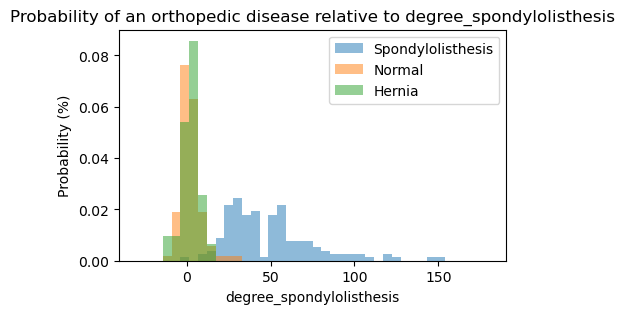

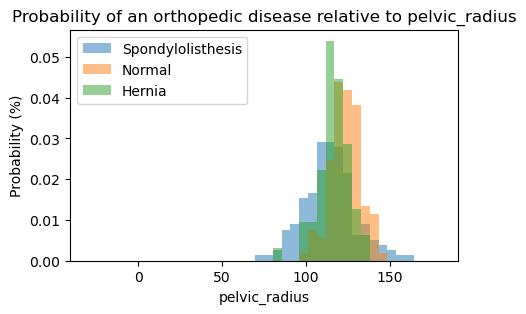

In [6]:
import matplotlib.pyplot as plt

df_discriminative = df.drop(["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "pelvic_radius"], axis=1);

plt.figure(figsize=(5,3))
for type in set(df['class']):
    plt.hist(most_discriminative_data[df['class'] == type], range=(-30, 180), bins=40, alpha=0.5, label=type, density=True)
plt.xlabel(most_discriminative)
plt.ylabel('Probability (%)')
plt.legend()
plt.title("Probability of an orthopedic disease relative to " + most_discriminative)
plt.show()

plt.figure(figsize=(5,3))
for type in set(df['class']):
    plt.hist(least_discriminative_data[df['class'] == type], range=(-30, 180), bins=40, alpha=0.5, label=type, density=True)
plt.xlabel(least_discriminative)
plt.ylabel('Probability (%)')
plt.legend()
plt.title("Probability of an orthopedic disease relative to " + least_discriminative)
plt.show()

## Exercise 2

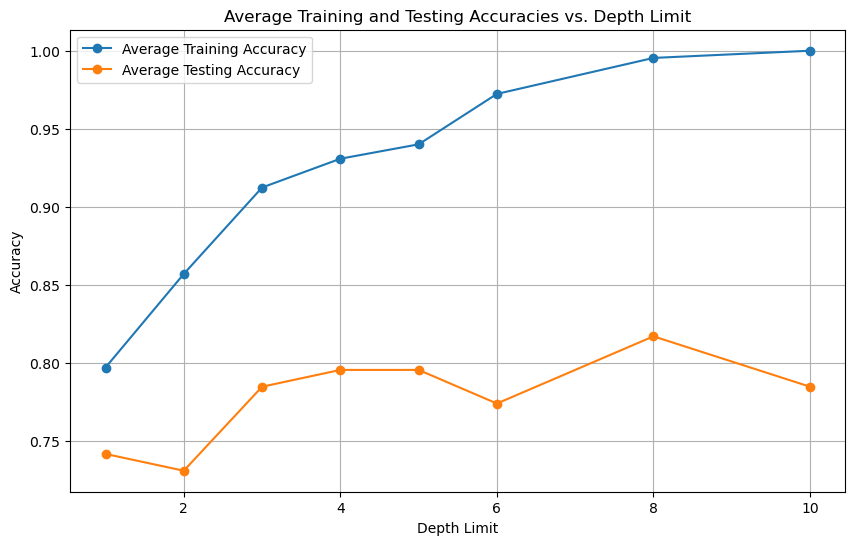

In [7]:
'''from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(df_inputs, df_outputs, train_size=0.7, stratify=df_outputs, random_state=0)

# Varying depth limits
depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = [] '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Varying depth limits
depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

# Initialize lists to store average training and testing accuracies
avg_train_accuracies = []
avg_test_accuracies = []

# Number of runs per parameterization
num_runs = 10

# Fixed seed for reproducibility
random_state = 0

for depth in depth_limits:
    train_accuracies = []
    test_accuracies = []

    for _ in range(num_runs):
        # Split data into training and testing sets with a stratified 70-30 split
        X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, test_size=0.3, random_state=random_state)

        # Train a decision tree classifier with the specified depth limit
        clf = DecisionTreeClassifier(max_depth=depth, random_state=random_state)

        # Fit the model
        clf.fit(X_train, y_train)

        # Calculate training accuracy
        train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracies.append(train_accuracy)

        # Calculate testing accuracy
        test_pred = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_accuracies.append(test_accuracy)

    # Calculate the average training and testing accuracies for this depth limit
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)

    avg_train_accuracies.append(avg_train_accuracy)
    avg_test_accuracies.append(avg_test_accuracy)

# Create a plot to visualize average training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, avg_train_accuracies, label='Average Training Accuracy', marker='o')
plt.plot(depth_limits, avg_test_accuracies, label='Average Testing Accuracy', marker='o')
plt.title('Average Training and Testing Accuracies vs. Depth Limit')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





## Exercise 3

As the gap between training and testing accuracies widens, we approach of overfitting. This occurs when a model becomes overly complex due to analysing noise from the training data set.

Initially, when we have lower depth limits in the decision tree, there is a relatively smaller difference between the training and testing accuracies. This suggests that the model is not capturing enough information from the training data, resulting in lower performance on both datasets.

However, as we progressively increase the depth limits, we notice the difference between training and testing accuracies starting to grow. This widening gap indicates that the model is becoming more complex and has the capacity to fit the training data more closely. However when it comes to testing the model it starts picking up too much noise from the training data set, and starts to overcomplicate.

A depth limit of 4 or 5 appears to be the most apropriate for achieving the best accuracy while not being to far away from the accuracy of the training data. 

## Exercise 4

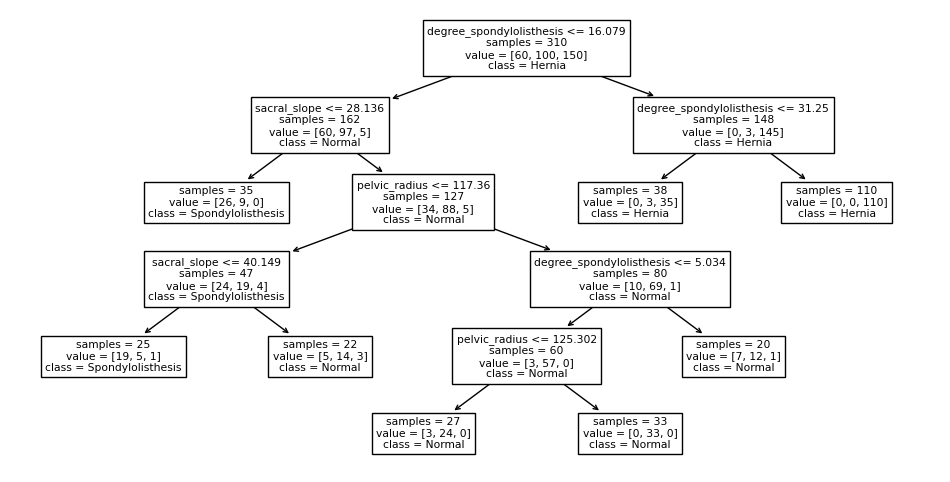

In [23]:
from sklearn import tree

predictor = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
predictor.fit(df_inputs, df_outputs)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=list(df.columns), class_names=list(set(df['class'])), impurity=False)
plt.show()